# Fábrica de Chocolate - Análises Descritiva e Diagnóstica

<br>

## Imports

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # para o Scatter Plot
#import warnings
import sklearn as sk
#warnings.filterwarnings('ignore')

%matplotlib inline

class color: # para formatar os prints
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Teste!' + color.END)

Teste!


<br>

In [4]:
df = pd.read_csv(r'D:\Python_Scripts\Desafio_Fabrica_de_Chocolate\registros-prod.csv', delimiter = ',')

# Análise Descritiva - Primeira parte

<br>

### Importando as colunas e analisando o cabeçalho

In [5]:
df.tail()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
495,301.01,1.59,A,10.471494
496,331.41,2.60,A,12.048504
497,311.08,0.38,C,6.128060
498,315.56,1.89,B,9.198321
499,309.30,2.91,A,12.686713


### Informações das colunas (data types, quantidade de dados por coluna...)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   VAR_2        500 non-null    object 
 3   PESO_BOMBOM  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


### Há algum campo nulo em alguma coluna do dataset?

In [7]:
print(pd.isnull(df).sum())

QTD_CHOC       0
VAR_1          0
VAR_2          0
PESO_BOMBOM    0
dtype: int64


### Descrição de todas as colunas numéricas

In [8]:
# Quando temos uma variável com uma diferença muito grande entre a média e a mediana, com certeza há outliers na mesma
df[['QTD_CHOC', 'VAR_1', 'PESO_BOMBOM']].describe() # ou df.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


### Descrição de todas as Colunas

In [9]:
df.describe(include='all')

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
count,500.000000,500.000000,500,500.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,C,NaN
freq,NaN,NaN,177,NaN
mean,291.264600,2.098180,NaN,10.395002
std,45.182499,0.711166,NaN,1.572233
min,112.910000,0.050000,NaN,4.543124
25%,259.267500,1.630000,NaN,9.425819
50%,295.450000,2.300000,NaN,10.334273
75%,325.137500,2.672500,NaN,11.379932


### Histograma PESO_BOMBOM



Total de bombons no conjunto de dados: 500 unidades.


• Quantidade de bombons descartados(abaixo de 9g): 83 unidades -> ≅ 17% do total de bombons;
• Quantidade de bombons com sobrepeso(acima de 12g): 72 unidades -> ≅ 14% do total de bombons;


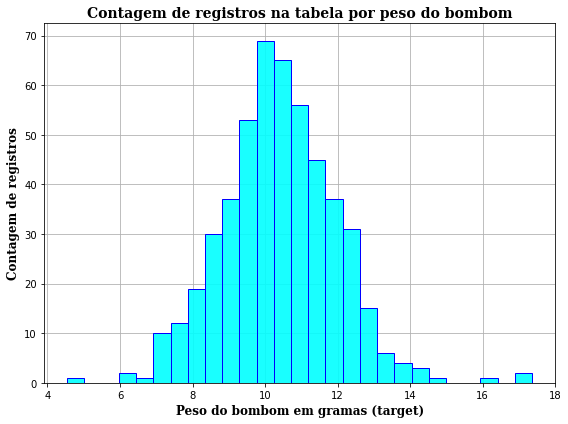

In [10]:
#Distribuição dos dados de seu dataset
#É um contador, que detecta a frequência de registros dos valores de uma variável 

descartados = round(df[df['PESO_BOMBOM'] < 9])
gastoProdutos = round(df[df['PESO_BOMBOM'] > 12])

print('\n')
print(color.BOLD + 'Total de bombons no conjunto de dados: {} unidades.'.format(len(df['PESO_BOMBOM'])))
print('\n')
print('• Quantidade de bombons descartados(abaixo de 9g): {} unidades -> ≅ 17% do total de bombons;'.format(len(descartados)))
print('• Quantidade de bombons com sobrepeso(acima de 12g): {} unidades -> ≅ 14% do total de bombons;'.format(len(gastoProdutos)))

plt.figure(figsize = (8,6))
sns.histplot(x = 'PESO_BOMBOM',data = df, color = '#00FFFF', edgecolor="blue", linewidth=1, alpha = 0.9, zorder = 3)
plt.grid(True, zorder = 0)
plt.xlabel('Peso do bombom em gramas (target)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Contagem de registros', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.title('Contagem de registros na tabela por peso do bombom', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.tight_layout()

### Histograma VAR_2

Quantidade de registros por classe:


• Classe C: 177 registros;
• Classe B: 165 registros;
• Classe A: 158 registros.


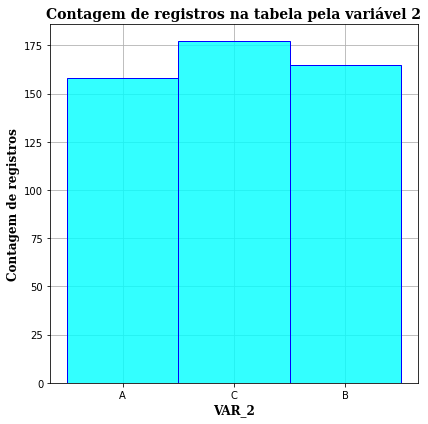

In [11]:
#é interessante vermos a quantidade de registros por classe em nosso dataset, para sabermos se há uma boa distribuição dos
#dados, ou se há uma diferença desleal entre os mesmos, algo que atrapalharia nossa análise
#Perceber se há uma discrepância muito grande, quanto a quantidade de dados de cada classe
classe_a = round((df[df['VAR_2'] == 'A']))
classe_b = round((df[df['VAR_2'] == 'B']))
classe_c = round((df[df['VAR_2'] == 'C']))

print(color.BOLD + 'Quantidade de registros por classe:' )
print('\n')
print('• Classe C: {} registros;'.format(len(classe_c)))
print('• Classe B: {} registros;'.format(len(classe_b)))
print('• Classe A: {} registros.'.format(len(classe_a))+ color.END)

plt.figure(figsize = (6,6))
sns.histplot(x = 'VAR_2',data = df, color = '#00FFFF', edgecolor="blue", linewidth=1, alpha = 0.8, zorder = 3)
plt.grid(True, zorder = 0)
plt.xlabel('VAR_2', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Contagem de registros', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.title('Contagem de registros na tabela pela variável 2', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.tight_layout()

### Histograma QTD_CHOC


Intervalos com maior quantidade de registros:


• Quantidade de registros entre 250 e 300: 183 registros;
• Quantidade de registros entre 301 e 350: 170 registros.


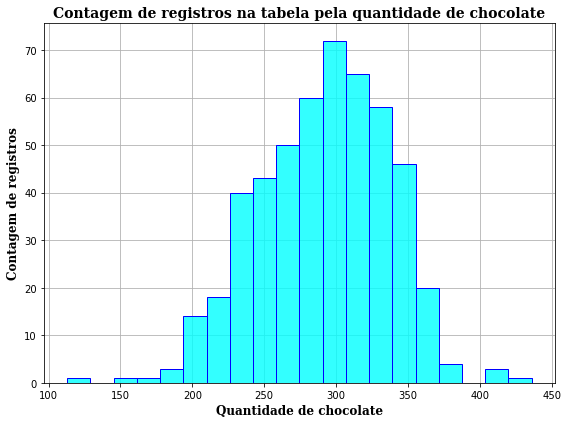

In [12]:
qtdChocolateMaior = df[(df['QTD_CHOC'] > 301) & (df['QTD_CHOC']<= 350)]
qtdChocolateMenor = df[(df['QTD_CHOC'] >= 250) & (df['QTD_CHOC']<= 300)]

print(color.BOLD)
print('Intervalos com maior quantidade de registros:')
print('\n')
print('• Quantidade de registros entre 250 e 300: {} registros;'.format(len(qtdChocolateMaior))) # onde tem o maior pico
print('• Quantidade de registros entre 301 e 350: {} registros.'.format(len(qtdChocolateMenor))+ color.END)

plt.figure(figsize = (8,6))
sns.histplot(x = 'QTD_CHOC',data = df, color = '#00FFFF', edgecolor="blue", linewidth=1, alpha = 0.8, zorder = 3)
plt.grid(True, zorder = 0)
plt.xlabel('Quantidade de chocolate', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Contagem de registros', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.title('Contagem de registros na tabela pela quantidade de chocolate', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.tight_layout()

### Histograma VAR_1


Intervalo com maior quantidade de registros:


• Registros entre 2.5 e 3.0: 181 registros.


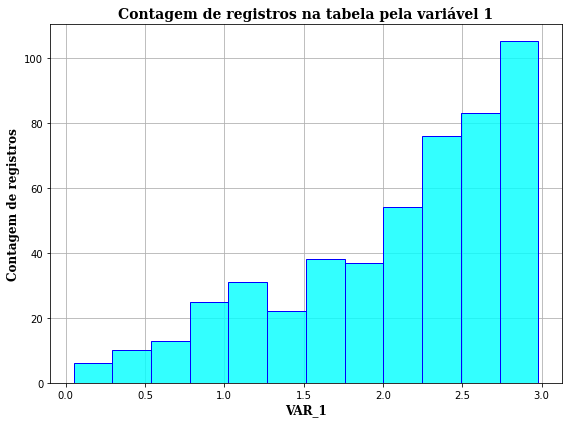

In [13]:
qtdVAR_1maior = df[(df['VAR_1'] > 2.5) & (df['VAR_1'] <=3.0)]

print(color.BOLD)
print('Intervalo com maior quantidade de registros:')
print('\n')
print('• Registros entre 2.5 e 3.0: {} registros.'.format(len(qtdVAR_1maior))) # onde tem o maior pico

plt.figure(figsize = (8,6))
sns.histplot(x = 'VAR_1',data = df, color = '#00FFFF', edgecolor="blue", linewidth=1, alpha = 0.8, zorder = 3)
plt.grid(True, zorder = 0)
plt.xlabel('VAR_1', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Contagem de registros', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.title('Contagem de registros na tabela pela variável 1', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.tight_layout()
# Aparentemente não possui possiveis outliers

<br>

# Análise Diagnóstica - Segunda parte

<br>

## Tratando a variável categórica VAR_2

In [14]:
# Label Encoder (melhor alternativa)
def trat_var2 (dado):
    if dado == 'A':
        return 1
    elif dado == 'B':
        return 2
    else:
        return 3

In [15]:
df_tratado = pd.DataFrame()
df_tratado[['PESO_BOMBOM', 'VAR_1', 'QTD_CHOC']] = df[['PESO_BOMBOM', 'VAR_1', 'QTD_CHOC']]
df_tratado['VAR_2'] = df['VAR_2'].apply(trat_var2)
df_tratado.head()

,PESO_BOMBOM,VAR_1,QTD_CHOC,VAR_2
0,10.144919,0.88,320.15,1
1,11.547027,1.55,320.14,1
2,11.112109,2.97,284.85,1
3,9.900123,2.36,263.92,3
4,10.079822,2.98,276.22,3


## Heat map, mostrando a correlação entre as variáveis 

<AxesSubplot:>

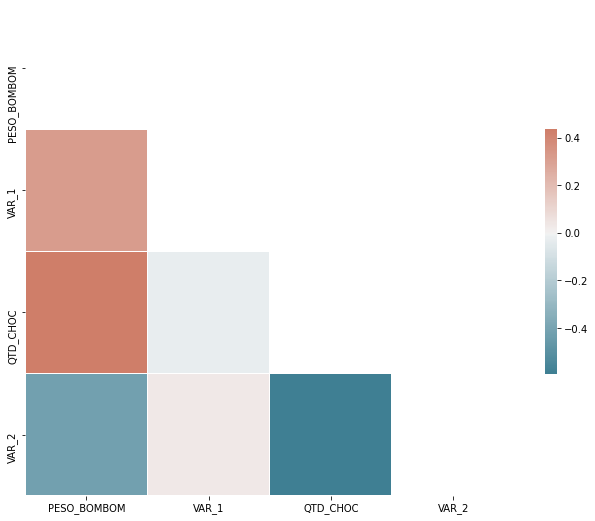

In [16]:
corr = df_tratado.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

<br>

## Scatter Plots

In [17]:
def scatter_plot_r(x, 
                   y, 
                   title_label, 
                   x_label, 
                   y_label):
    """"Plota um gráfico de linhas com dados de previsão e de teste. 
    Args:
          x: variavel independente
          y: variavel dependente
          title_label(str): título do gráfico.
          x_label(str): Nome do label do eixo X.
          y_label(str): Nome do label do eixo Y.
    """
    #Calcula o coef. de Correlação
    pearson = stats.pearsonr(x,y)[0]
    # Determina o estilo
    sns.set_style("whitegrid", {'grid.linestyle': ':'})
    # Determina o tamanho do gráfico.
    fig, ax = plt.subplots(figsize=(9,8))

    #plota o gráfico
    ax = sns.regplot(x=x,
                     y=y,
                     robust = False, # True: ignora os outliers,demora mais para calcular a regressão linear
                     scatter_kws={"color":'#0000CD',"alpha":0.2,"s":50},
                     line_kws={"color":'#00FFFF',"alpha":0.9,"lw":1},
                     label="Coeficiente de Correlação = {0:.2f}".format(pearson))

    #local da legenda
    ax.legend(loc="best")
    #plota titulo
    ax.set_title(title_label, size = 15, fontdict={'family': 'serif','color' : 'black','weight': 'bold'})
    #plota eixo x
    ax.set_xlabel(x_label, horizontalalignment='left', x=0, size = 14)
    #plota eixo y
    ax.set_ylabel(y_label,horizontalalignment='left', y=0, size = 14)
    #retira as linhas que delimitam o gráfico
    sns.despine(top=True, right=True, left=False, bottom=False)
    #seta o Zero como limite
    plt.ylim(ymin=0)  
    #Mostra o gráfico
    plt.show()

<Figure size 720x432 with 0 Axes>

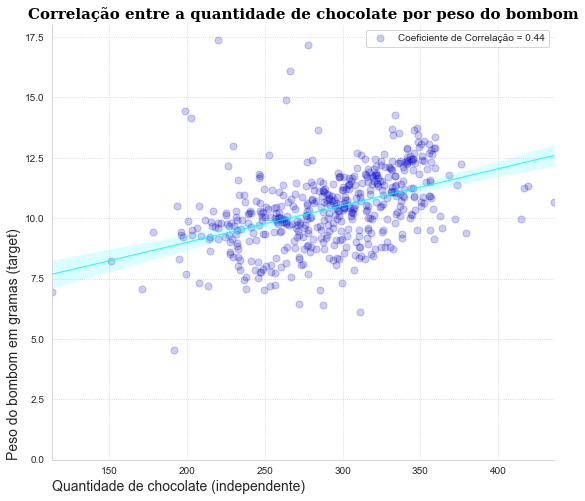

<Figure size 432x288 with 0 Axes>

In [18]:
#0.60 é uma correlação regular, 0.70 é uma correlação boa, 0.80 ótima e 0.90 excelente
#essa variável não tem uma correlação tão alta com o target, então ela não pode ser considerada uma boa variável independente
#em relação ao target e sua previsão
#Na regressão linear, a linha nada mais é, do que a regressão. Ela está tentando tracejar uma reta, que alcance a maior quantidade
#de amostras, para assim, detectar o percentual de correlação entre as variáveis dependete(target) e independente
#esse gráfico nos ajuda a entender para onde a máquina olhou, para nos dizer se há uma boa correlação entre a variável indep
#e a target, monstrando o percentual de correlação entre as duas
plt.figure(figsize=(10,6))
scatter_plot_r(df["QTD_CHOC"], 
               df["PESO_BOMBOM"], 
               "Correlação entre a quantidade de chocolate por peso do bombom", 
               "Quantidade de chocolate (independente)", 
               "Peso do bombom em gramas (target)")
plt.tight_layout()

<Figure size 720x432 with 0 Axes>

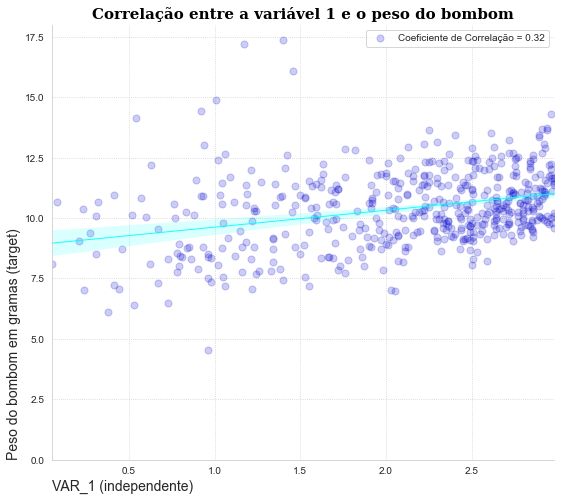

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10,6))
scatter_plot_r(df["VAR_1"], 
               df["PESO_BOMBOM"], 
               "Correlação entre a variável 1 e o peso do bombom", 
               "VAR_1 (independente)", 
               "Peso do bombom em gramas (target)")
plt.tight_layout()

## Box Plot - Peso do bombom (Target) por Classe (VAR_2)

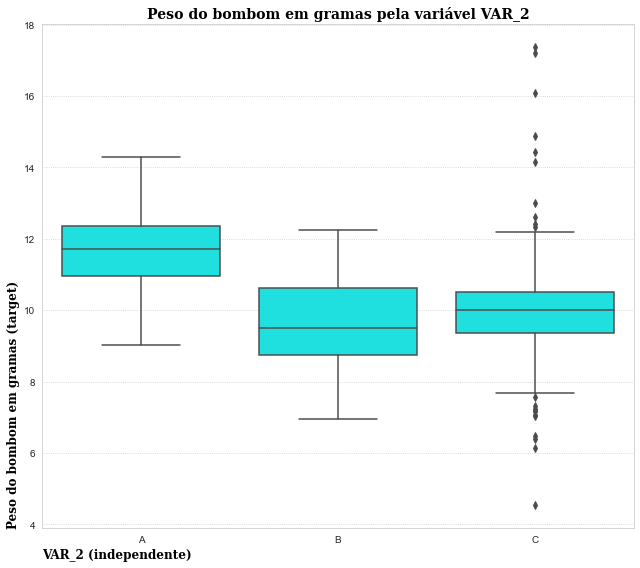

In [20]:
#Mediana é o valor/sinalizador que separa a metade menor da metade maior da metade menor de uma amostra

plt.figure(figsize=(9,8))
           
grouped = df.loc[:,['VAR_2', 'QTD_CHOC']] \
    .groupby(['VAR_2']) \
    .median() \
    .sort_values(by='QTD_CHOC', ascending = False)

#sns.color_palette("Blues", as_cmap=True)

sns.boxplot(x="VAR_2", y="PESO_BOMBOM", data=df, order = grouped.index, color = 'Cyan')
  
plt.title('Peso do bombom em gramas pela variável VAR_2', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.xlabel("VAR_2 (independente)", horizontalalignment='left', x=0, fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Peso do bombom em gramas (target)', horizontalalignment='left', y=0, fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.tight_layout()
plt.show()

## Criando um DF sem os possíveis Outliers

In [21]:
df_sem_outliers = df[(df['QTD_CHOC'] >= 180) & (df['QTD_CHOC'] <= 420)]

## Box Plot - Quantidade de chocolate por Classe (VAR_2)


______________________________
Valor mínimo da classe A: 281;
Mediana da classe A: 324;
Valor máximo da classe A: 360.
______________________________
Valor mínimo da classe B: 196;
Mediana da classe B: 300;
Valor máximo da classe B: 420.
______________________________
Valor mínimo da classe C: 192;
Mediana da classe C: 259;
Valor máximo da classe C: 337.
______________________________



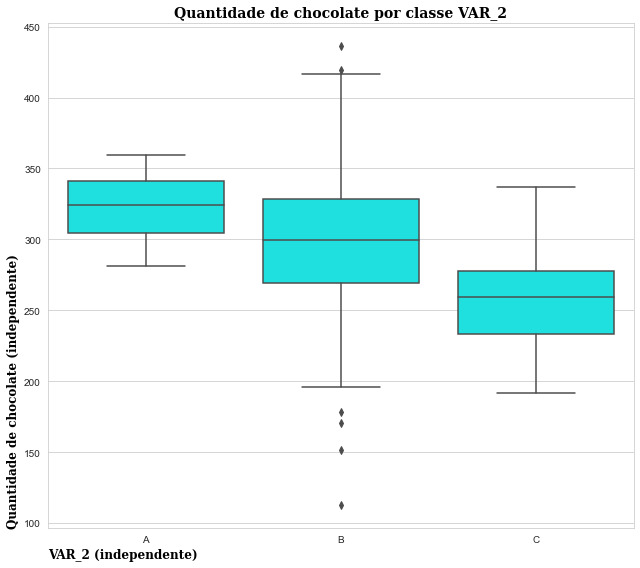

In [22]:
#Mediana é o valor/sinalizador que separa a metade menor da metade maior de uma amostra
# Podemos entender que a Classe A, esta mostrando ser a mais padronizada e organizada de todas 
# A classe B, acaba sendo a menos organizada e padronizada, tendo uma diferença muito grande entre a qtdade de chocolate máxima 
# e mínima
classe_b_SO = round((df_sem_outliers[df_sem_outliers['VAR_2'] == 'B']))

print(color.BOLD)
print('_'*30)
print('Valor mínimo da classe A: {};'.format(round(classe_a['QTD_CHOC'].min(axis = 0))))
print('Mediana da classe A: 324;')
print('Valor máximo da classe A: {}.'.format(round(classe_a['QTD_CHOC'].max(axis = 0))))
print('_'*30)
print('Valor mínimo da classe B: {};'.format(round(classe_b_SO['QTD_CHOC'].min(axis = 0))))
print('Mediana da classe B: 300;')
print('Valor máximo da classe B: {}.'.format(round(classe_b_SO['QTD_CHOC'].max(axis = 0))))
print('_'*30)
print('Valor mínimo da classe C: {};'.format(round(classe_c['QTD_CHOC'].min(axis = 0))))
print('Mediana da classe C: 259;')
print('Valor máximo da classe C: {}.'.format(round(classe_c['QTD_CHOC'].max(axis = 0))))
print('_'*30)
print(color.END)

plt.figure(figsize=(9,8))
           
grouped = df.loc[:,['VAR_2', 'QTD_CHOC']] \
    .groupby(['VAR_2']) \
    .median() \
    .sort_values(by='QTD_CHOC', ascending = False)

sns.set_style('whitegrid')

ax = sns.boxplot(x="VAR_2", y="QTD_CHOC", data=df, order = grouped.index, color = 'Cyan')

plt.title('Quantidade de chocolate por classe VAR_2', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.xlabel("VAR_2 (independente)", horizontalalignment='left', x=0, fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Quantidade de chocolate (independente)', horizontalalignment='left', y=0, fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.tight_layout()
plt.show()

# Box Plot - com filtro

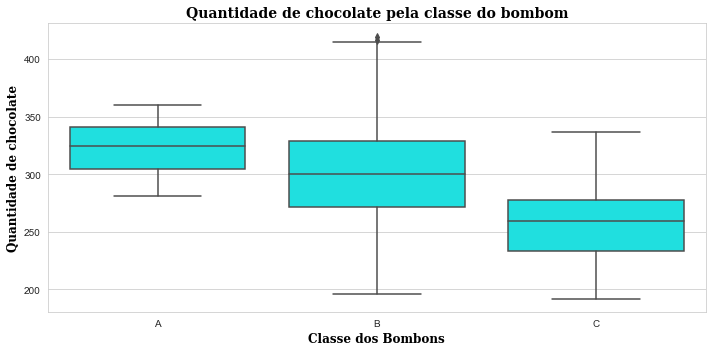

In [23]:
#Removi os dados discrepantes, pois os mesmos pareciam outliers(possiveis erros de digitação), porém deve ser validado,
#com um profissional da área se estes dados realmente são outliers
# Estes valores mínimos mostram de forma discrepante um dos possíveis motivos, do porque a classe A possui uma estabilidade
#maior, comparada às classes B e C
plt.figure(figsize=(10,5))
grouped = df_sem_outliers.loc[:,['VAR_2', 'QTD_CHOC']] \
    .groupby(['VAR_2']) \
    .median() \
    .sort_values(by='QTD_CHOC', ascending = False)

ax = sns.boxplot(x="VAR_2", y="QTD_CHOC", data=df_sem_outliers, order = grouped.index, color = 'Cyan')
plt.title('Quantidade de chocolate pela classe do bombom', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.xlabel("Classe dos Bombons", fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Quantidade de chocolate', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.tight_layout()
plt.show()

<br>